# Задание 03

### 1. Связь AUC-ROC  и доли верных ответов (2 балла)
Пусть дана некоторая выборка $X$ и классификатор $b(x)$, возвращающий в качестве оценки принадлежности объекта $x$ к положительному классу 0 или 1 (а не вероятности). 

1) Постройте ROC-кривую для классификатора $b(x)$ на выборке $X$.

2) Покажите, что AUC-ROC классификатора $b(x)$ может быть выражена через долю правильных ответов и полноту классификатора $a(x;t)$, получающегося при выборе некоторого порога $t \in (0;1)$ ($a(x)=[b(x)>t]$). Помимо указанных величин в формулу могут входить $N,N_+,N_-$, число объектов, число положительных и отрицательных объектов в выборке $X$ соответсвенно. 


### 2. ROC, PR кривые  (2 балла)
Алгоритм  бинарной классификации выдает оценки вероятности принадлежности к положительному классу  $b_i=\hat{\mathcal{ P}}(y_i=+|x_i)$. Всего есть $N=10 000$ наблюдений. Если ранжировать их по возрастанию $b_i$, то окажется, что наблюдения с $y_i=1$ и наблюдения с $y_i=0$ образуют чередующиеся блоки различного размера:
$$
\underbrace{-------}_{3N/8}\underbrace{+++++++}_{3N/8}\underbrace{-------}_{N/8}\underbrace{+++++++}_{N/8}
$$
Постройте $ROC$ и $PR$ кривые, определите площади под кривыми. 

# Задание 1

1. Roc-curve:
    Поскольку у нас в задаче речь идёт о бинарном алгоритме, то на графике рок-кривой будет всего три точки, (0.0), (1,1) и (FPR,TPR), если пороговое значение для промежуточной точки находится в интервале (0,1), в проивном случае на графике будут присутствовать лишь две крайние точки
<img src="roccurve.png">

2. Вычислим AUC-ROC:
    
    Площадь под линией можно представить в виде суммы двух площадей: треугольника и трапеции.
    
    $$AUC = S_{triangle}+S_{trapezium}$$	
    
    $$S_{triangle} = \frac{TPR\cdot FPR}{2}$$
    
    $$S_{trapezium} = \frac{TPR+1}{2}\cdot (1-FPR)$$
    
    $$AUC=\frac{TPR\cdot FPR}{2}+\frac{TPR+1}{2}\cdot (1-FPR)=\frac{TPR-FPR+1}{2}$$
    
    Теперь покажем, что можно выразить данный показатель через полноту алгоритма a(x,t) и долю правильных ответов алгоритма b(x).
    
    Для начала обозначим полноту алгоритма а, как pax, и рассмотрим, чему она равна. Так как она строится на основании ответов алгоритма b при возможности варьировать порог только внутри интервала (0,1), поэтому значение полноты будет постоянным и будет совпадать с TPR для алгоритма b.
    
    $$pax = \frac{TP}{TP+FN}$$
    
    $$TPR = \frac{TP}{TP+FN}$$
    
    Поэтому нам лишь необходимо выразить FPR, в котором знаменатель равен $N_{-}$
    
    $$FPR=\frac{FP}{FP+TN}$$
    
    При этом TP можно выразить через pax:
    
    $$pax\cdot N_+=TP$$
    
    Запишем теперь выражение для accuracy:
    
    $$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$
    
    Отсюда
    
    $$TN=\frac{accuracy}{N}-TP$$
    
    Зная, что:
    
    $$FP=N_--TN$$
    
    Можем записать выражение для FP:
    
    $$FP=N_--\frac{accuracy}{N}+pax\cdot N_+$$
    
    Тогда FPR запишется следующим образом:
    
    $$FPR = \frac{N_--\frac{accuracy}{N}+pax\cdot N_+}{N_-}$$
    
    Отсюда следует, что auc выражается подстановкой полученных значений FPR и TPR в изначальную формулу

# ROC, PR кривые

    1. ROC-curve
    
<img src="roccurve2.png">

$$AUC=0.25*0.25+0.75*1=0.8125$$

    2. Теперь перейдём к pr кривой, тут все довольно очевидно до того момента, когда мы подходим к увеличению порога для куска объектов, длиной 3/8N, так как ничего в задании не сказано про то, равны ли вероятности, выдаваемые алгоритмом на этих объектах, поэтому будем считать, что они не равны, в таком случае происходит следующее:
    
    Значение TP при увеличении порога будет стремиться от 5000/10000 к 1250/10000, по 1/10000 за объект.
    
    При этом параметр FP будет оставаться неизменным и равняться 1250/10000.
    
    Recall же за каждый пройденный объект будет уменьшаться на 0.75/3750
    
    График на этих объектах в таком случае опишет дугу, которая будет состоять из множества маленьких трапеций, сумма площадей которых будет нас интересовать в дальнейшем. Сам график выглядит следующим образом
    
   <img src="prcurve.png">
   
    Площадь графика под pr кривой можно посчитать, как сумму площадей под дугой и прямоугольника.
    
   $$S_{rectangle} = 0.25*1 = 0.25$$
    
    Площадь же под дугой можно вычислить, как уже отмечалось через сумму площадей трапеций, тогда для неё получаем формулу:
    
  $$
    S_{curve}=\sum_{t=0}^{3749}\frac{Precision_t+Precision_{t+1}}{2}\cdot \frac{0.75}{3750}
  $$
  
    Это примерно равняется 0.521
    
    Тогда полная площадь под pr кривой равняется: 
    
   $$S_{pr}=0.771$$
    
    Если же мы предположим, что на данном куске из объектов, вероятности, которые для них выдаёт алгоритм одинаковые, то вместо дуги мы получим прямую линию, соединяющую точки (0.25, 0.5) и (1, 0.8). В таком случае площадт под кривой будет равна:
    
   $$S_{pr}=0.25+\frac{(0.8+0.5)}{2} \cdot 0.75 = 0.7375$$

In [81]:
TP = 5000.0/10000
FP = 1250.0/10000
area = 0.0
for i in range(3750):
    TP2 = TP-10**(-4)
    area+=(TP/(TP+FP)+TP2/(TP2+FP))/2
    TP-=10**(-4)
area*=0.75/3750
print(area)
area+=(0.25*1)
print("AUC-PR:",area)

0.5209273142314769
AUC-PR: 0.7709273142314769


### 3. Логистическая регрессия на данных (6 баллов )

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

### [Данные](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
Будем анализировать данные, связанные с прямыми маркетинговыми кампаниями (телефонными звонками) португальского банковского учреждения. Цель классификации - предсказать, будет ли клиент подписывать (1/0) срочный депозит (переменная y).



   #### bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
      "blue-collar","self-employed","retired","technician","services") 
   * 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "unknown","secondary","primary","tertiary")
   * 5 - default: has credit in default? (binary: "yes","no")
   * 6 - balance: average yearly balance, in euros (numeric) 
   * 7 - housing: has housing loan? (binary: "yes","no")
   * 8 - loan: has personal loan? (binary: "yes","no")
   related with the last contact of the current campaign:
   * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   * 10 - day: last contact day of the month (numeric)
   * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 12 - duration: last contact duration, in seconds (numeric)
   other attributes:
   * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (target):
   * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [2]:
data = pd.read_csv('/home/lars/Рабочий стол/bank.csv', sep=';',header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [83]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


#### 3.1. Какова доля положительных объектов в выборке?

In [3]:
#ваш код здесь
print("Доля положительных ответов в выборке:",len(data[data['y']=='yes'])/len(data)*100,"%")

Доля положительных ответов в выборке: 11.523999115239992 %


####  3. 2. Подготовка данных. 
1. Подготовьте матрицу объект-признак:
 * удалите (но не навсегда!) целевой признак ('y') 

 * удалите признак 'day' (можно навсегда) 

 * Все категориальные признаки преобразуйте в бинарные, используя [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 


2. Подготовьте целевой вектор: 
    
 * преобразуйте признак 'y' в вектор, состоящий из нулей (y='no') и единиц (y='yes').
 

In [4]:
#ваш код здесь
Y = data['y']
X = data.iloc[:,:-1]
X.drop(['day'],axis=1, inplace=True)
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month','poutcome'])
Y = pd.get_dummies(Y)['yes']

#### 3. 3. Логистическая регрессия.

* Разделите выборку в соотношении 70:30;

* Обучите логистическую регрессию с параметрами по умолчанию. 


In [9]:
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,shuffle=True)
logistic = LogisticRegression()

logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)
#ваш код здесь

/home/lars/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9078850405305822

#### 3.4. Чему равны следующие метрики качества:

   * Доля верных предсказаний,
   * Точность,
   * Полнота,
   * F1-мера? 

In [11]:
print("Доля верных предсказаний",metrics.accuracy_score(y_test, logistic.predict(X_test)))
print("Точность",metrics.precision_score(y_test,logistic.predict(X_test),average='binary'))
print("Полнота",metrics.recall_score(y_test,logistic.predict(X_test),average='binary'))
print("F-мера",metrics.f1_score(y_test,logistic.predict(X_test),average='binary'))
#ваш код здесь

Доля верных предсказаний 0.9078850405305822
Точность 0.6060606060606061
Полнота 0.28776978417266186
F-мера 0.3902439024390244


#### 3.5. Постройте ROC кривую и найдите площадь под кривой. 

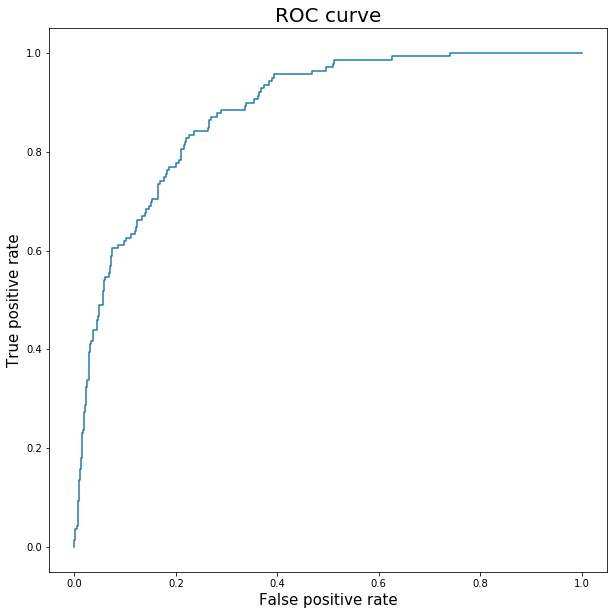

AUC: 0.8813776564954933


In [88]:
#ваш код здесь

fpr, tpr, thresholds = metrics.roc_curve(y_test, logistic.predict_proba(X_test)[:,1], pos_label=1)

fig = plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.xlabel("False positive rate", fontsize=15)
plt.ylabel("True positive rate", fontsize=15)
plt.title("ROC curve", fontsize=20)
plt.show()

print("AUC:",metrics.auc(fpr,tpr))

#### 3.6. Порог $t$ в модели логистической регрессии по умолчанию $t=0.5$. 

$a(x) = \begin{cases}
        +1, \, b(x) \ge t,\\
        -1, \, b(x) < t.
        \end{cases}$ 
        
Измените порог на $t=0.2$. Как изменятся метрики качества для такого классификатора? 


In [8]:
THRESHOLD = 0.2
preds = np.where(logistic.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print("Доля верных предсказаний",metrics.accuracy_score(y_test,preds))
print("Точность",metrics.precision_score(y_test,preds,average='binary'))
print("Полнота",metrics.recall_score(y_test,preds,average='binary'))
print("F-мера",metrics.f1_score(y_test,preds,average='binary'))
#ваш код здесь

Доля верных предсказаний 0.871039056742815
Точность 0.41346153846153844
Полнота 0.6187050359712231
F-мера 0.4956772334293948


Точность очевидным образом упала, потому что стали ниже требования для отнесения к положительному классу, полнота же наоборот по этой причине возросла. F-мера значительноо выросла

#### 3.7. Постройте логистическую регрессию, штрафующую несбалансированные классы по-разному (пропорционально доли класса). Как изменились метрики качества классификатора? 

In [40]:
logistic = LogisticRegression(class_weight='balanced')

logistic.fit(X_train, y_train)
#logistic.score(X_test, y_test)

print("Доля верных предсказаний",metrics.accuracy_score(y_test,logistic.predict(X_test)))
print("Точность",metrics.precision_score(y_test,logistic.predict(X_test),average='binary'))
print("Полнота",metrics.recall_score(y_test,logistic.predict(X_test),average='binary'))
print("F-мера",metrics.f1_score(y_test,logistic.predict(X_test),average='binary'))
#ваш код здесь

Доля верных предсказаний 0.8084008843036109
Точность 0.3149847094801223
Полнота 0.7410071942446043
F-мера 0.44206008583690987


/home/lars/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Упали такие параметры, как доля верных предсказаний, точность и F-мера(относительно изменённого порога, но не относительно дефолтной регрессии), однако полнота заметно подросла

#### 3.8. Построите логистическую регрессию с L1-регуляризацией. С помощью GridSearchCV определите наилучший гиперпараметр С. 
Воспользуйтесь StratifiedKFold для кросс-валидации, при таком разбиении сохраняется соотношение классов в обучающей и тестовой выборках. 

In [45]:
grid={"C":np.logspace(-3,3,10)}

kf = StratifiedKFold(n_splits=10,random_state=1648,shuffle=True)
optimizer = GridSearchCV(LogisticRegression(solver = 'liblinear',penalty='l1'), 
                         grid, cv = kf, scoring= 'accuracy',iid=True)
optimizer.fit(X,Y)

print("Best value for C is", optimizer.best_params_['C'])

Best value for C is 0.46415888336127775


#### 3.9. Постройте зависимость средней ошибки классификатора (доля верных предсказаний) от значения параметра регуляризации. 

Best value 0.46415888336127775 with result 0.9002433090024331


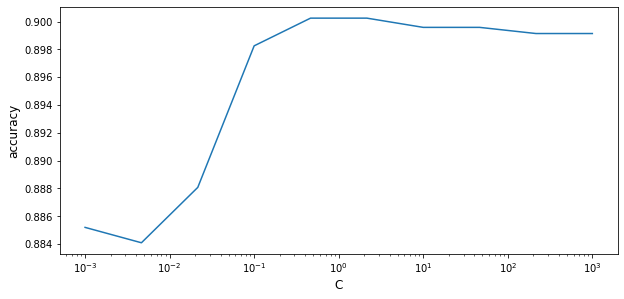

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1)

ax.plot(grid['C'], optimizer.cv_results_['mean_test_score'])
plt.xscale("log")
ax.set_xlabel("C", fontsize=12)
ax.set_ylabel("accuracy", fontsize=12)
ax.set_label("Dependece of accuracy on parameter C")

print("Best value",grid['C'][np.argmax(optimizer.cv_results_['mean_test_score'])],"with result",
      optimizer.cv_results_['mean_test_score'][np.argmax(optimizer.cv_results_['mean_test_score'])])
